In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
iris=pd.read_csv('iris.csv')

In [62]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
# Check for missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
# Check data types and structure
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [65]:
# Summary statistics of numerical columns
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [66]:
# Define features and target
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

## Train-Test Split and Normalization

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

In [68]:
# Normalize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [69]:
# Train KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

In [70]:
print("\nAccuracy with K=3:", accuracy_score(y_test, y_pred) * 100, "%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy with K=3: 91.11111111111111 %

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.73      0.85        15

       accuracy                           0.91        45
      macro avg       0.93      0.91      0.91        45
   weighted avg       0.93      0.91      0.91        45



## Find the Best K Value

In [71]:
# Range of K values
k_values = range(1, 21)
accuracies = []

In [72]:
# Test each K value
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(x_train_scaled, y_train)
    y_pred_k = knn_k.predict(x_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Find best K
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K: {best_k} with Accuracy: {max(accuracies) * 100:.2f}%")



Best K: 9 with Accuracy: 95.56%


## Accuracy vs. K Plot

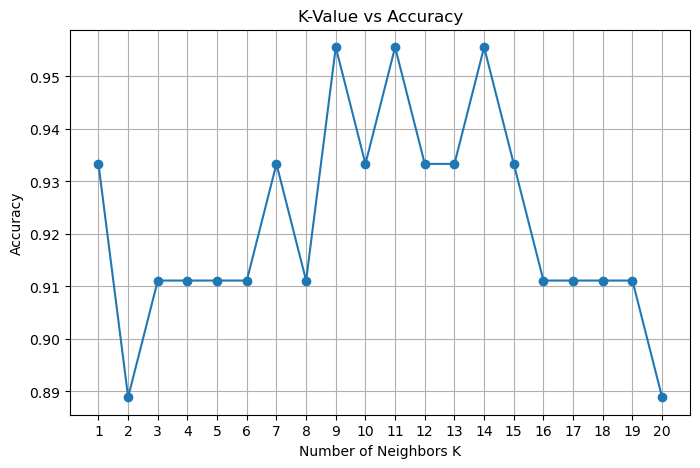

In [73]:
# Plot Accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.title("K-Value vs Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Decision Boundary Visualization

In [74]:
# Select only two features for visualization
x_two_features = iris[['PetalLengthCm', 'PetalWidthCm']]
y_labels = iris['Species']

In [75]:
# Train-test split
x_train_2f, x_test_2f, y_train_2f, y_test_2f = train_test_split(
    x_two_features, y_labels, test_size=0.3, random_state=42, stratify=y_labels
)

In [76]:
# Normalize
scaler_2f = StandardScaler()
x_train_2f_scaled = scaler_2f.fit_transform(x_train_2f)
xx_test_2f_scaled = scaler_2f.transform(x_test_2f)

In [77]:
# Model with best K
knn_2f = KNeighborsClassifier(n_neighbors=best_k)
knn_2f.fit(x_train_2f_scaled, y_train_2f)

KNeighborsClassifier(n_neighbors=9)

In [78]:
# Meshgrid for decision boundary
h = 0.02
x_min, x_max = x_train_2f_scaled[:, 0].min() - 1, x_train_2f_scaled[:, 0].max() + 1
y_min, y_max = x_train_2f_scaled[:, 1].min() - 1, x_train_2f_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


In [79]:
Z = knn_2f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


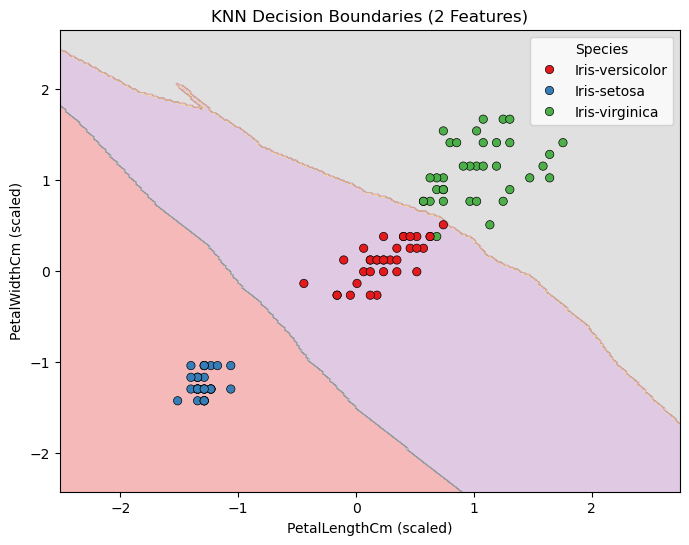

In [82]:
# Plot
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_to_num = {label: i for i, label in enumerate(species)}
Z_num = np.vectorize(label_to_num.get)(Z)  # Convert string labels to numbers

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_num, alpha=0.3, cmap=plt.cm.Set1)
sns.scatterplot(x=x_train_2f_scaled[:, 0], y=x_train_2f_scaled[:, 1],
                hue=y_train_2f, palette='Set1', edgecolor='k')
plt.xlabel("PetalLengthCm (scaled)")
plt.ylabel("PetalWidthCm (scaled)")
plt.title("KNN Decision Boundaries (2 Features)")
plt.show()